### Ingest

In [ ]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from functions import(
    unique_values, missing_data,
    find_constant_columns,
    hist_box_qq, mini_describe,
    count_plots
)

In [2]:
# Import the dataset
df = pd.read_csv("dataset/archive/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Basic EDA

In [3]:
# Shape
df.shape

(303, 14)

observation: The dataset is quite small

In [4]:
# Find missing data
missing_data(df, show_all=False)

,Total,Percent,datatype


observatino: There are no missing data

In [5]:
# Find columns that contains constant values
find_constant_columns(df)

[]

observation: There are no columns that contain constant values

In [6]:
# Which datatypes dominate the dataset
df.dtypes.value_counts()

int64      13
float64     1
Name: count, dtype: int64

In [7]:
# Are there any duplicated columns in the dataset
df.duplicated()[df.duplicated()]

164    True
dtype: bool

In [8]:
# Drop the duplicate column
df = df.drop_duplicates(keep='first')

In [9]:
# Confirm that there are no more duplicates in teh dataset
df.duplicated()[df.duplicated()]

Series([], dtype: bool)

In [10]:
# Train test split
train, test = train_test_split(df, test_size=0.2, stratify=df['target'], random_state=42)
train.shape, test.shape

((241, 14), (61, 14))

In [11]:
# Examine the columns in the train data and the amount of unique values that they contain
unique_values(train, max_colwidth=150)

,Total,Uniques,Values
sex,241,2,"[[0, 1]]"
fbs,241,2,"[[0, 1]]"
exang,241,2,"[[0, 1]]"
target,241,2,"[[1, 0]]"
restecg,241,3,"[[0, 1, 2]]"
slope,241,3,"[[2, 1, 0]]"
cp,241,4,"[[0, 1, 2, 3]]"
thal,241,4,"[[2, 1, 3, 0]]"
ca,241,5,"[[1, 3, 0, 2, 4]]"
oldpeak,241,38,"[[0.0, 2.0, 3.0, 1.2, 1.8, 3.5, 2.5, 0.8, 2.2, 1.9, 2.6, 0.5, 0.6, 1.5, 4.2, 0.2, 4.0, 0.1, 0.9, 1.6, 3.8, 1.4, 0.3, 1.0, 3.2, 0.4, 2.1, 2.8, 1.1,..."


Some columns contain few values and some contain plenty values

For the sake of exploration, the columns will be divided into two

In [12]:
# colums whose unique values are greater than 5 --- referred to numeric columns
num_cols = [col for col in train.columns if train[col].nunique() > 5]
# columns whose unique values are < or = 5  --- referred to as categorical columns
cat_cols = [col for col in train.columns if train[col].nunique() <= 5]

In [13]:
num_cols, cat_cols

(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'],
 ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'])

> Note: some of the variables in 'cat_cols' are not necessarilly categorical. It was divided based on number of unique values

In [14]:
# confirm that num_cols and cat_cols do not have any column in common
assert len(set(num_cols) & set(cat_cols)) == 0, "Num cols and cat cols have common values."

### cat cols

In [15]:
# Create a dataframe with the elements in cat_cols
cat_df = train.loc[:, cat_cols]
cat_df.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
59,0,0,0,0,0,2,1,2,1
247,1,1,0,1,1,1,3,1,0
289,0,0,0,2,1,1,1,3,0
288,1,0,0,1,1,1,1,3,0
64,1,2,1,0,0,2,0,2,1


In [16]:
#### The target column
cat_df.target.value_counts()

target
1    131
0    110
Name: count, dtype: int64

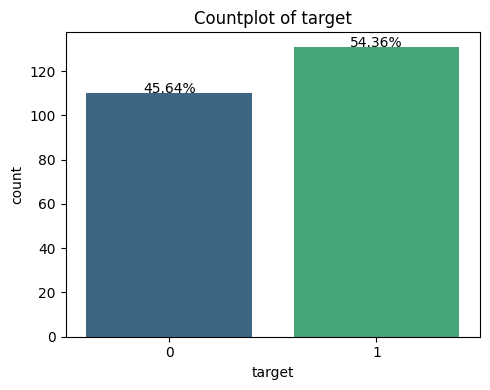

In [17]:
# Ecplore the target column
count_plots(cat_df, ['target'], figsize=(5, 4))

0 - No heart disease
1 - Heart disease

The data is moderately balanced. Accuracy will be used as the metric

In [51]:
#### Sex
cat_df.sex.value_counts()

sex
1    165
0     76
Name: count, dtype: int64

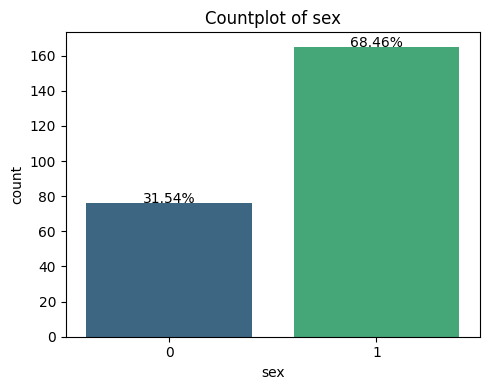

In [52]:
# Ecplore the target column
count_plots(cat_df, ['sex'], figsize=(5, 4))

In [18]:
#### cp
cat_df.cp.value_counts()

cp
0    114
2     69
1     43
3     15
Name: count, dtype: int64

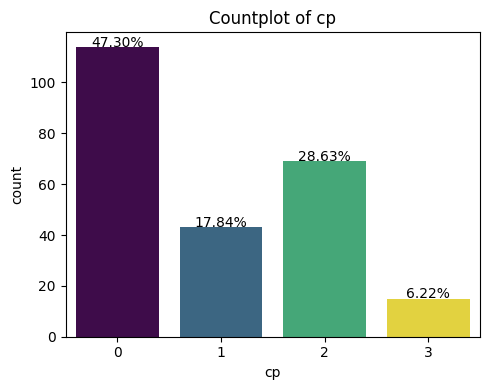

In [19]:
count_plots(cat_df, ['cp'], figsize=(5, 4))

Cp is the chest pain type

0 - typical angina
1 - atypical angina
2 - non-angina pain
3 - asymptomatic


Angina is a type of chest pain caused by reduced blood flow to the heart.

According to [ncbi](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5680106/), Typical angina (TA) is defined as substernal chest pain precipitated by physical exertion or emotional stress and relieved with rest or nitroglycerin. Women and elderly patients are usually have atypical symptoms both at rest and during stress, often in the setting of nonobstructive coronary artery disease (CAD).

Accordint to [ppschicago](https://ppschicago.com/pain-management/chest-pain/atypical-chest-pain/)When one experiences chest pain that doesn't meet the criteria for angina, it's known as atypical chest pain

Non-angina pain: Having chest pain but it is not caused by reduced blood flow to the heart

Asymptomatic: A person affected by a condition but producing or showing no symptoms of it.

In [20]:
### fbs
cat_df.fbs.value_counts()

fbs
0    207
1     34
Name: count, dtype: int64

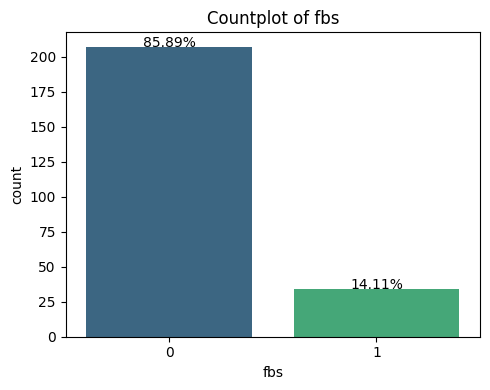

In [21]:
count_plots(cat_df, ['fbs'], figsize=(5, 4))

fbs  - fasting blood sugar > 120  mg/dl  
It is basically a question of whether your fasting blood sugar is > 120 mg/dl or not


According to [mountsinai website](https://www.mountsinai.org/health-library/tests/blood-sugar-test-blood)
+ If you had a fasting blood glucose test, a level of 70 to 99 mg/dL (3.9 and 5.5 mmol/L) is considered normal.
+ If you had a random blood glucose test, a normal result depends on when you last ate. Most of the time, the blood glucose level will be 125 mg/dL (6.9 mmol/L) or lower.
+ A level of 126 mg/dL (7 mmol/L) or higher usually means you have diabetes.

> fbs basically means Diabetes or Not

In [22]:
## Restecg
cat_df.restecg.value_counts()

restecg
1    125
0    112
2      4
Name: count, dtype: int64

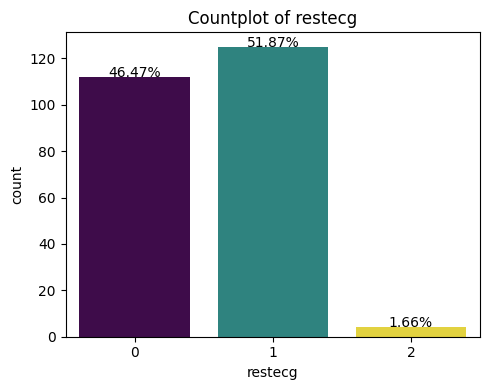

In [23]:
count_plots(cat_df, ['restecg'], figsize=(5, 4))

restecg - Resting electrocardiographic results
(0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).

According to [ascotcardiologygroup](https://ascotcardiologygroup.co.nz/services/diagnostic-resting-ecg/), A Diagnostic Resting ECG (electrocardiogram) records the electrical activity of your heart while you are at rest. It provides information about your heart rate and rhythm, and can also show if there is enlargement of the heart, or evidence of a previous heart attack.   
However, it does not show whether you have asymptomatic blockages in your coronary (heart) arteries, or predict your risk of a future heart attack. The resting ECG is different from a stress or exercise ECG or cardiac imaging tests.


Normal i.e ECG reading show no significant abnormalities in the electrical activity of the heart while the person is at rest. i.e no immediate signs of related heart issues. 

ST-T Wave Abnormality i.e There are some deviations from the normal ECG pattern, particularly in the ST segment and T wave.  
ST-T wave abnormalities could indicate different conditions e.g myocardial ischemia (reduced blood flow to the heart muscle), cardiac hypertrophy (enlargement of the heart muscle), or electrolyte imbalances.   
Further investigation may be needed to determine its significance and potential implications for the individual's health

Left Ventricular Hypertrophy i.e  Abnormal thickening or enlargement of the left ventricle of the heart, which is responsible for pumping oxygenated blood to the body. 
It could result from various conditions e.g. hypertension (high blood pressure), valve diseases, or cardiomyopathy (disease of the heart muscle).

In [24]:
## slope
cat_df.slope.value_counts()

slope
2    114
1    109
0     18
Name: count, dtype: int64

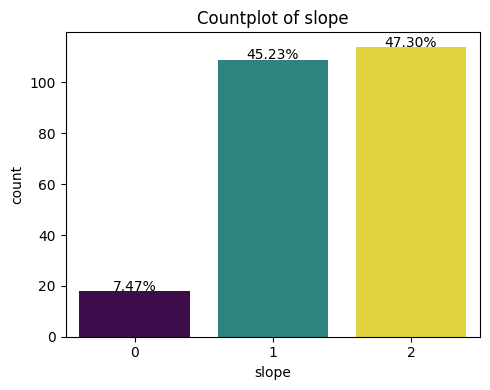

In [25]:
count_plots(cat_df, ['slope'], figsize=(5, 4))

Slope; Slope of the peak exercise ST segment  in the ECG result (0: upsloping, 1: flat, 2: downsloping)

In [26]:
### Exang
cat_df.exang.value_counts()

exang
0    159
1     82
Name: count, dtype: int64

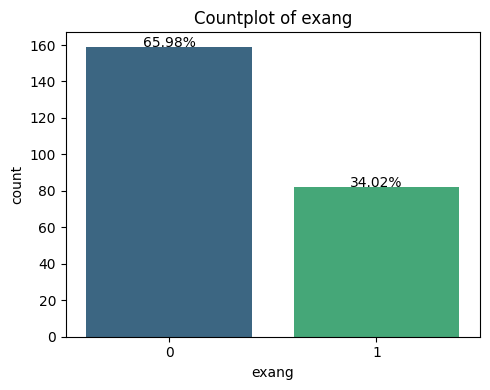

In [27]:
count_plots(cat_df, ['exang'], figsize=(5, 4))

exang - exercise induced angina   
This is the  chest pain or discomfort that occurs when the heart muscle (myocardium) doesn't receive enough oxygen-rich blood during physical activity or exertion. 

In [28]:
#### ca

In [29]:
cat_df.ca.value_counts()

ca
0    138
1     55
2     27
3     17
4      4
Name: count, dtype: int64

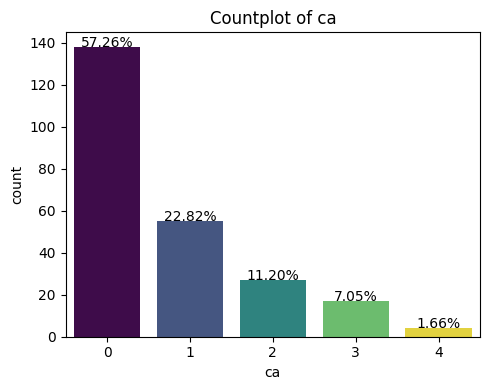

In [30]:
count_plots(cat_df, ['ca'], figsize=(5, 4))

ca - number of major vessels (0-3) colored by flourosopy	

It is used to assess teh severity of coronary artery blockages.  
This variable represents the number of major coronary arteries (i.e., the main arteries supplying blood to the heart muscle) that show evidence of obstruction or narrowing when visualized using coronary angiography with contrast dye.

In [31]:
### thal

In [32]:
cat_df.thal.value_counts()

thal
2    129
3     98
1     13
0      1
Name: count, dtype: int64

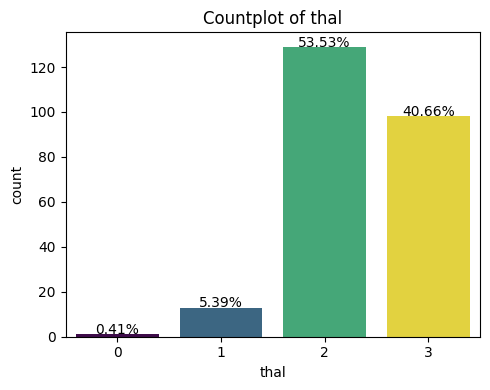

In [33]:
count_plots(cat_df, ['thal'], figsize=(5, 4))

thal: Defect type

### num cols

In [50]:
num_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [34]:
# Create a datafram with all the columns in num_cols
num_df = train.loc[:, num_cols]
num_df.head()

,age,trestbps,chol,thalach,oldpeak
59,57,128,303,159,0.0
247,66,160,246,120,0.0
289,55,128,205,130,2.0
288,57,110,335,143,3.0
64,58,140,211,165,0.0


In [35]:
# Age

Age is the age in years

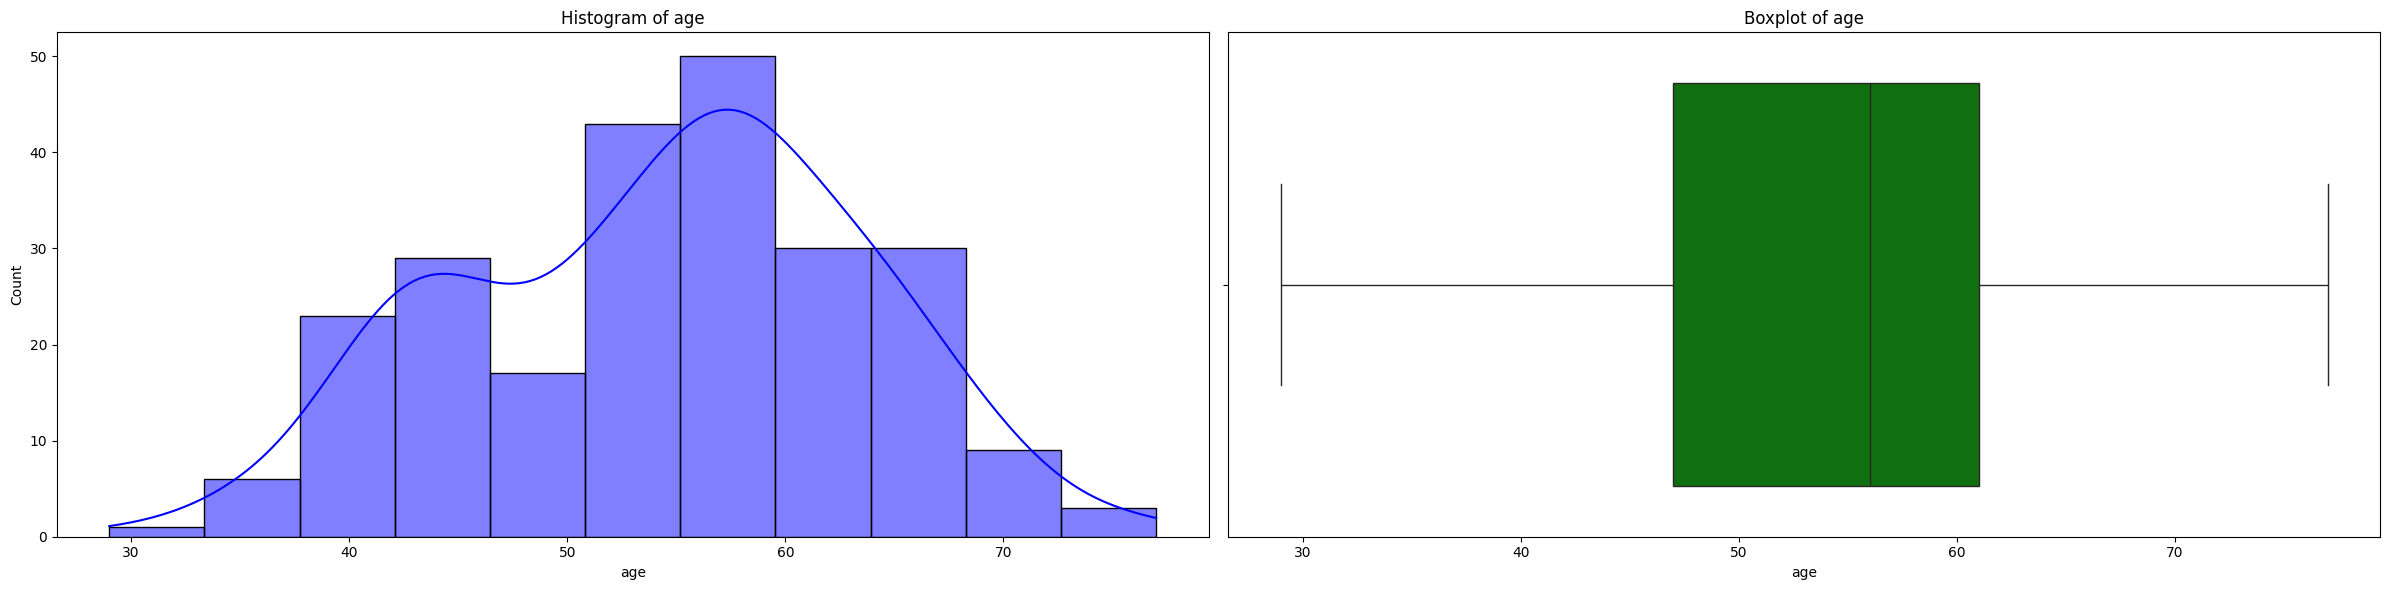

,count,mean,std,min,25%,50%,75%,max,Range,IQR
age,241.0,54.340249,9.220471,29.0,47.0,56.0,61.0,77.0,48.0,14.0


In [36]:
hist_box_qq(train, ['age'], figsize=(12, 6))
mini_describe(train, 'age')

The data contains a lot of older people. 
Peak around 45 years. peak around 55 years

No outliers

In [37]:
### Trestbps

trestbps - resting blood pressure (on admission to the hospital)	   mm Hg	

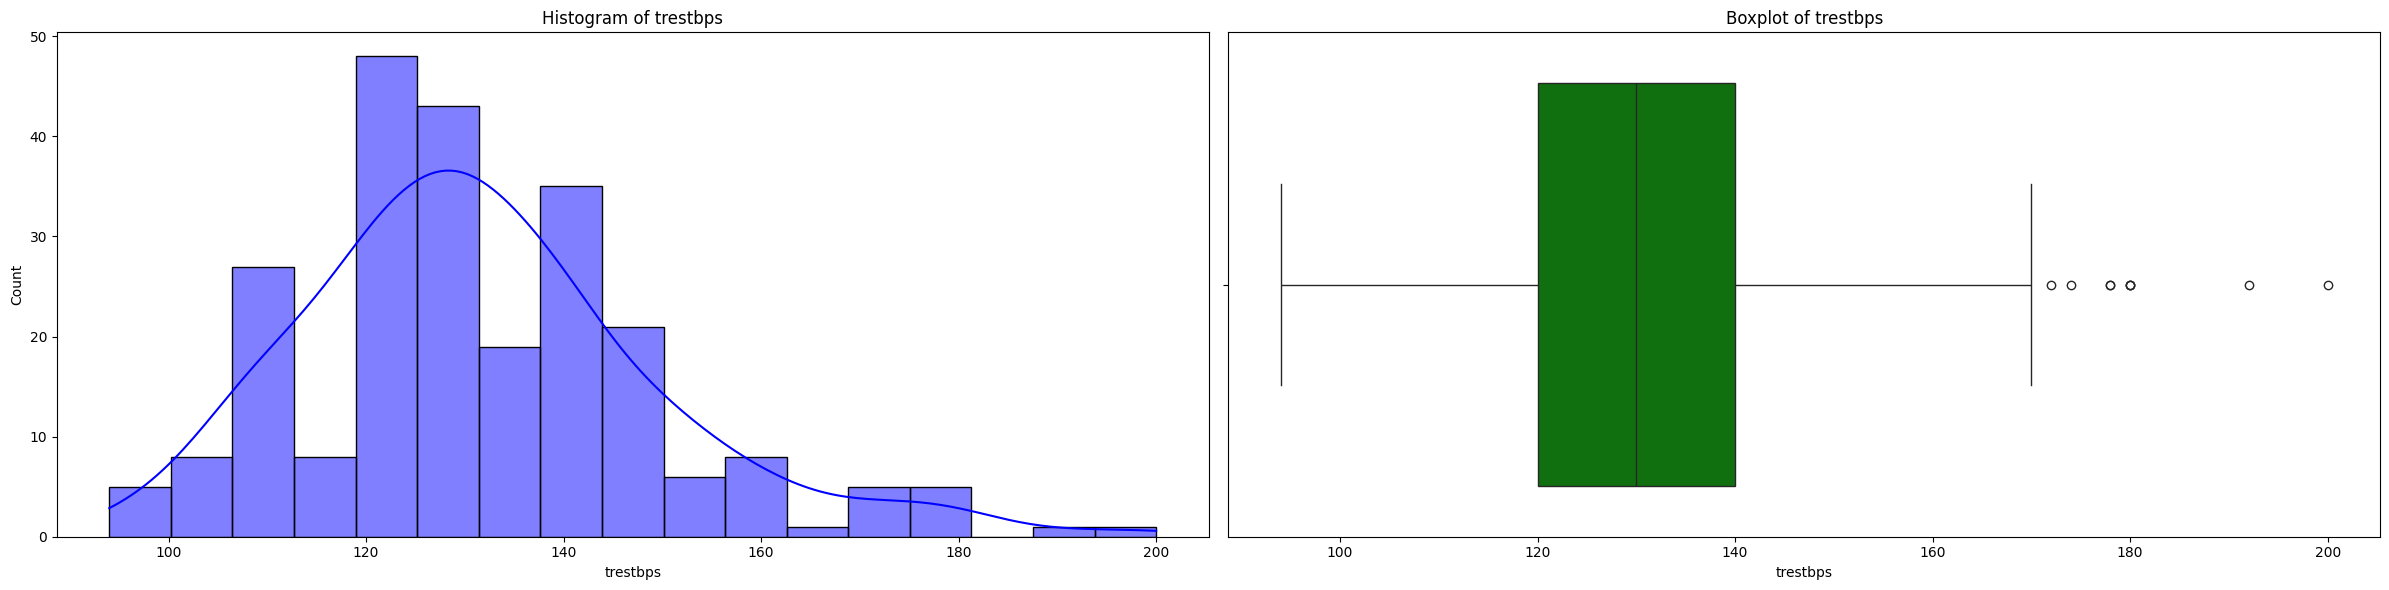

,count,mean,std,min,25%,50%,75%,max,Range,IQR
trestbps,241.0,131.448133,17.988376,94.0,120.0,130.0,140.0,200.0,106.0,20.0


In [38]:
hist_box_qq(train, ['trestbps'], figsize=(12, 6))
mini_describe(train, 'trestbps')

accordinng to [indianexpress website](https://indianexpress.com/article/health-wellness/fasting-blood-sugar-prediabetes-diagnosis-medication-8829255/)

These are the ranges of blood pressure
| BLOOD PRESSURE CATEGORY                              | SYSTOLIC mm Hg (upper number) | and/or | DIASTOLIC mm Hg (lower number) |
|-------------------------------------------------------|--------------------------------|--------|--------------------------------|
| NORMAL                                                | LESS THAN 120                 | and    | LESS THAN 80                   |
| ELEVATED                                              | 120 – 129                      | and    | LESS THAN 80                   |
| HIGH BLOOD PRESSURE (HYPERTENSION) STAGE 1           | 130 – 139                      | or     | 80 – 89                        |
| HIGH BLOOD PRESSURE (HYPERTENSION) STAGE 2           | 140 OR HIGHER                  | or     | 90 OR HIGHER                   |
| HYPERTENSIVE CRISIS (consult your doctor immediately)| HIGHER THAN 180                | and/or | HIGHER THAN 120                |


There are no outliers in the data

In [39]:
#### Chol

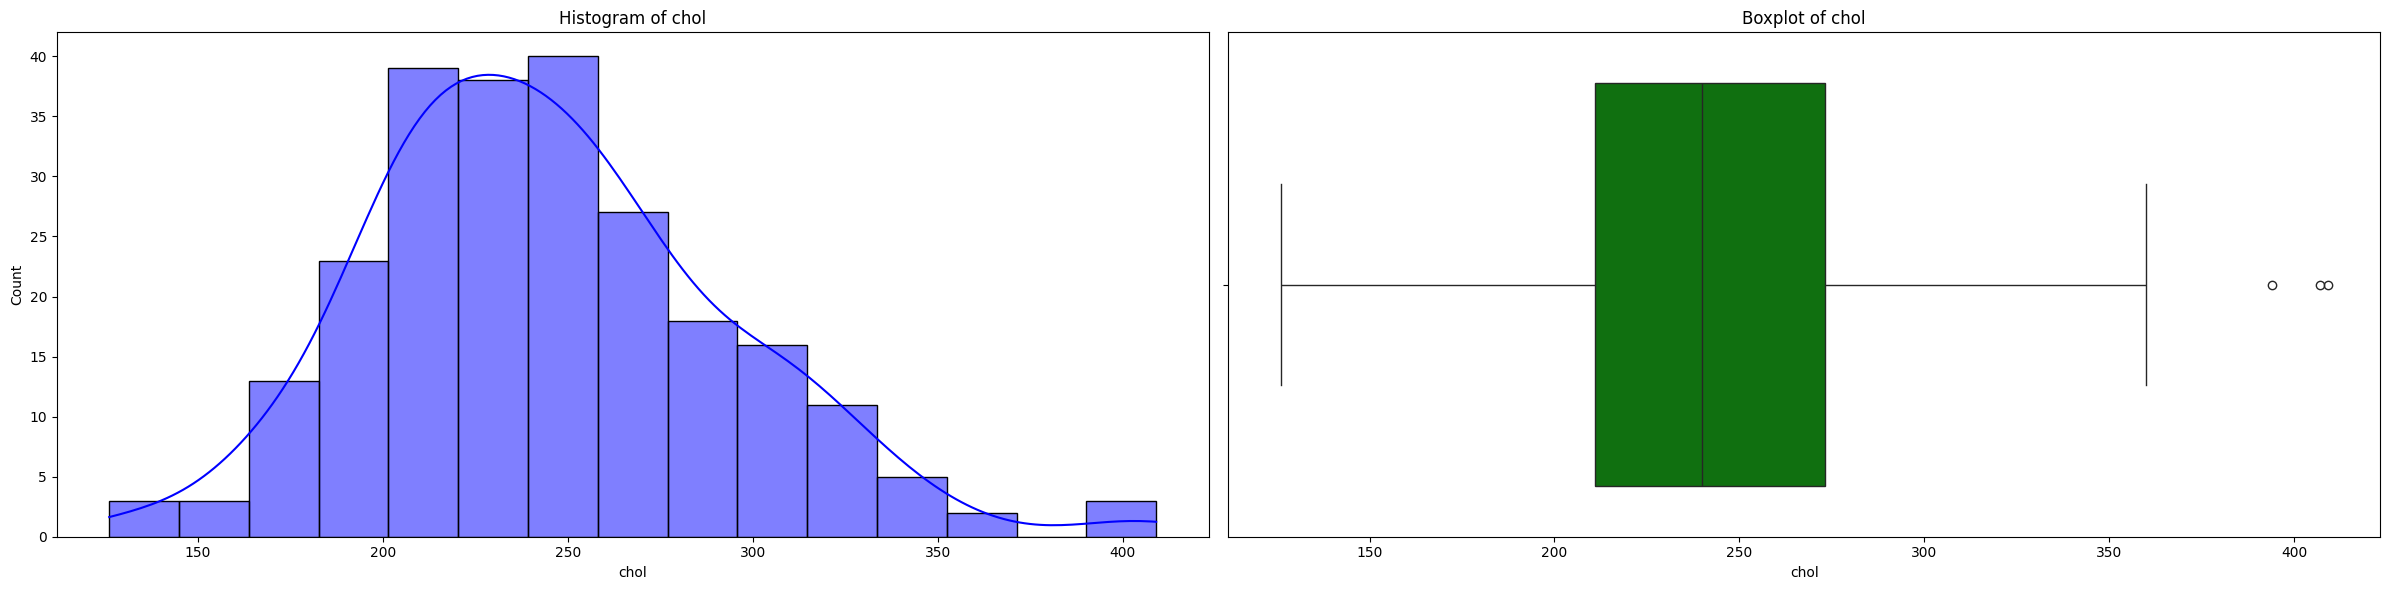

,count,mean,std,min,25%,50%,75%,max,Range,IQR
chol,241.0,244.298755,48.106154,126.0,211.0,240.0,273.0,409.0,283.0,62.0


In [40]:
hist_box_qq(train, ['chol'], figsize=(12, 6))
mini_describe(train, 'chol')

chol - serum cholesterol     mg/dl
 
Cholesterol is a type of body fat, or lipid. A person’s serum cholesterol level represents the amount of total cholesterol in their blood.

In [41]:
#### Thalach

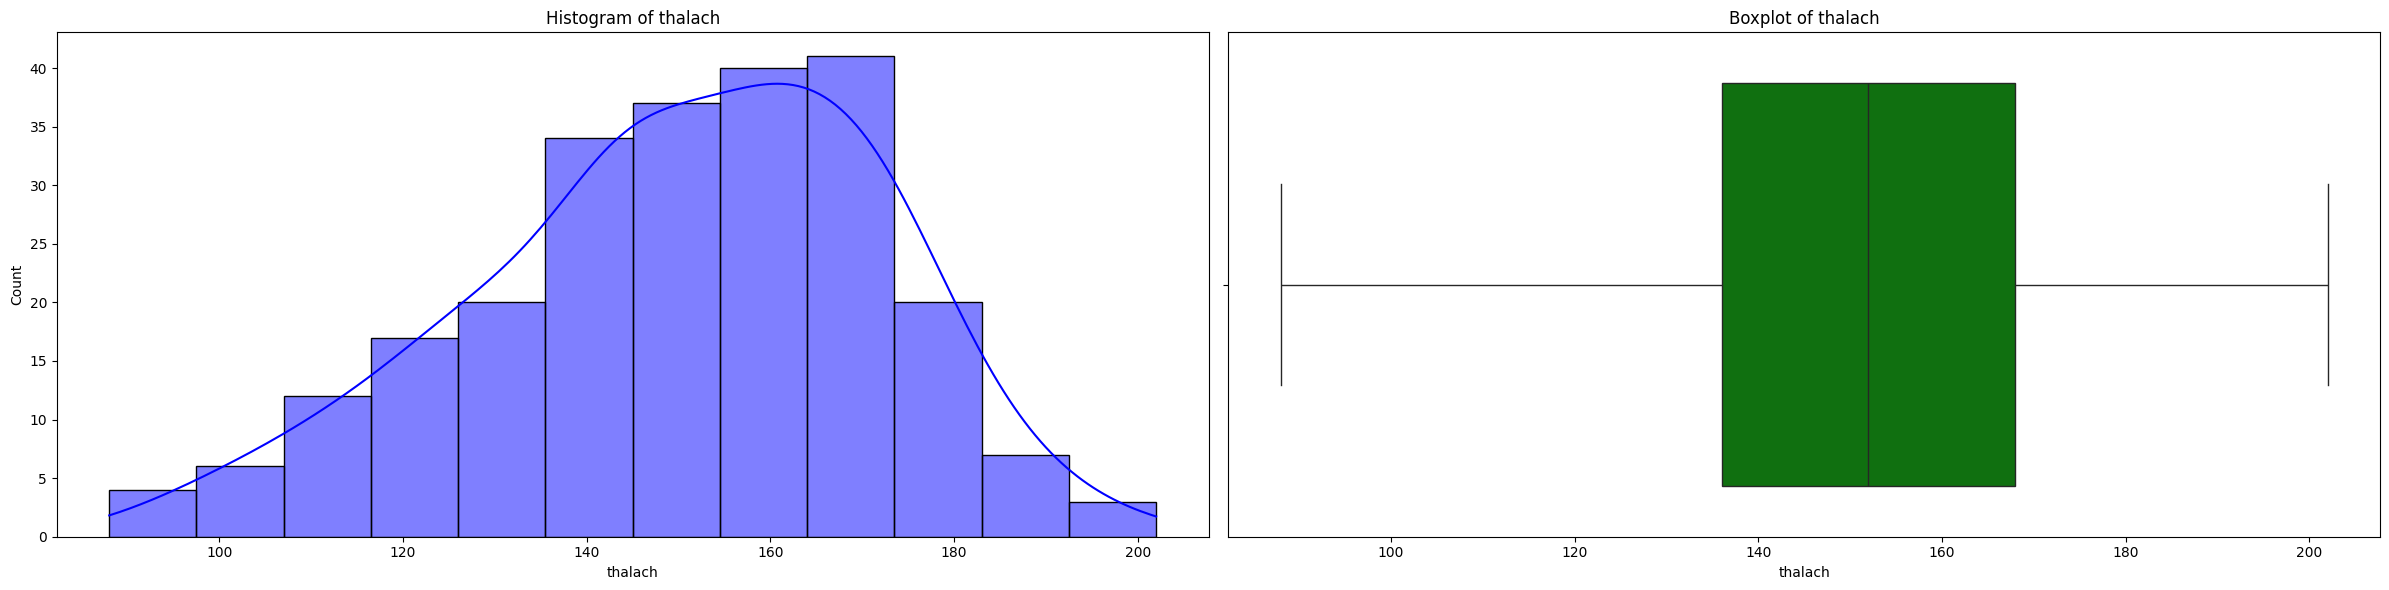

,count,mean,std,min,25%,50%,75%,max,Range,IQR
thalach,241.0,150.070539,22.087308,88.0,136.0,152.0,168.0,202.0,114.0,32.0


In [42]:
hist_box_qq(train, ['thalach'], figsize=(12, 6))
mini_describe(train, 'thalach')

thalach - maximum heart rate achieved

In [43]:
# Oldpeak

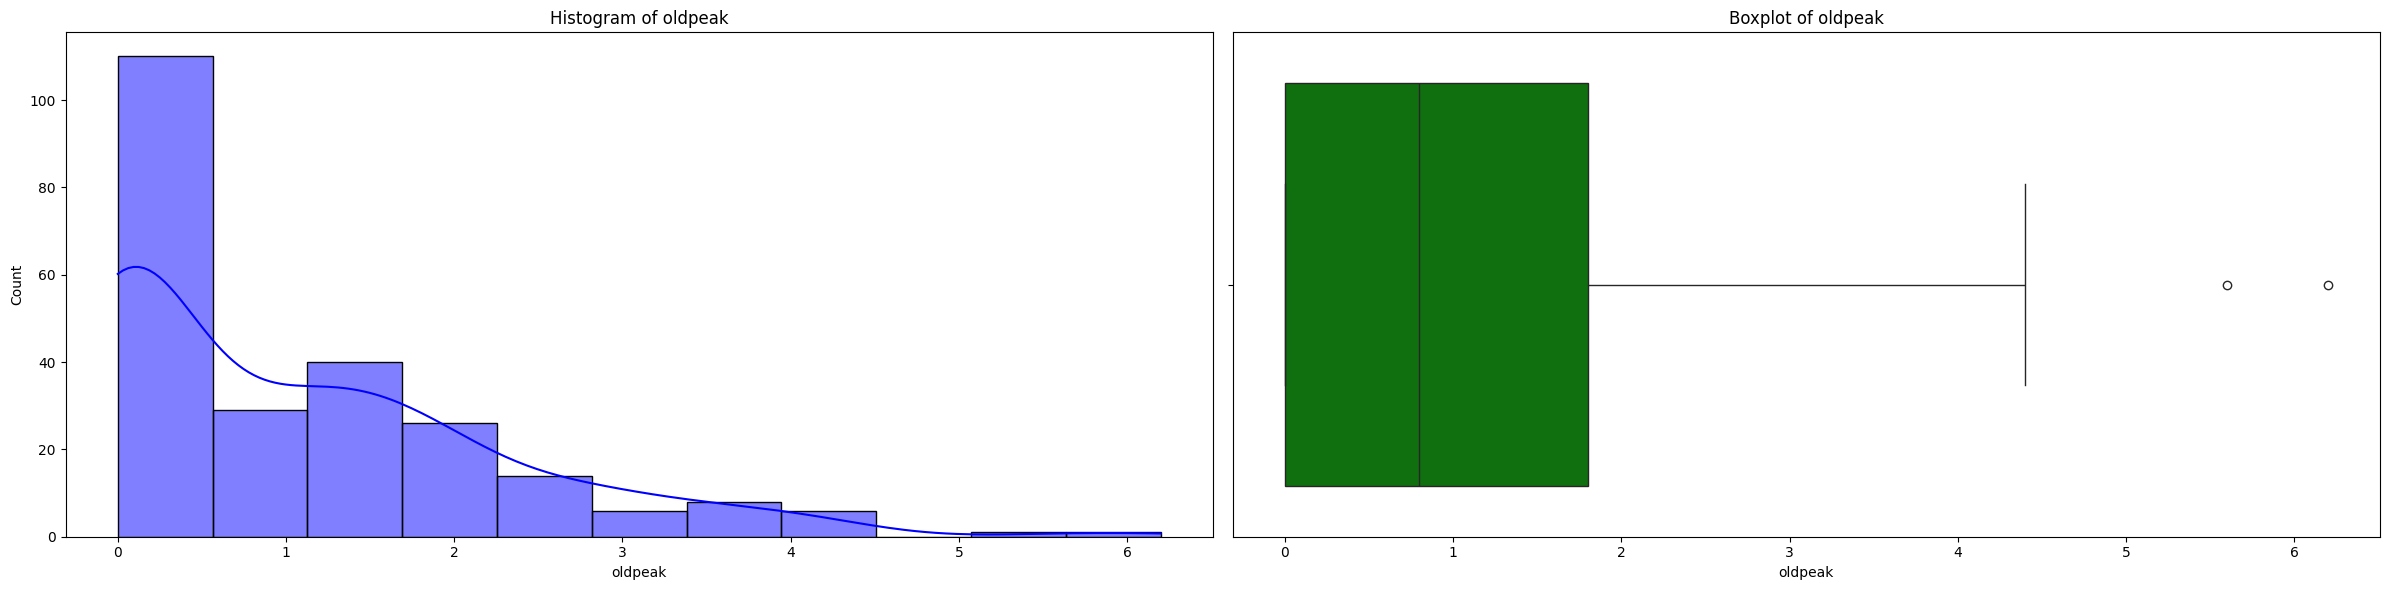

,count,mean,std,min,25%,50%,75%,max,Range,IQR
oldpeak,241.0,1.070954,1.206263,0.0,0.0,0.8,1.8,6.2,6.2,1.8


In [44]:
hist_box_qq(train, ['oldpeak'], figsize=(12, 6))
mini_describe(train, 'oldpeak')

oldpeak -- ST depression induced by exercise relative to rest	

It is linked wth ST - T finding in the ECG result.

ST depression refers to a downward deflection of the ST segment on the ECG tracing. 
hen this ST depression occurs during exercise compared to the baseline ECG taken at rest, it suggests myocardial ischemia - a condition where the heart muscle is not getting enough oxygen-rich blood supply to meet its demand during physical exertion.

<Axes: xlabel='sex', ylabel='count'>

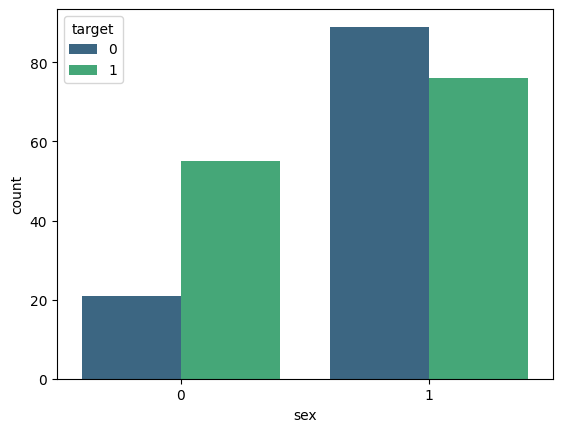

In [57]:
# sex vs heart disease
sns.countplot(data=train, x='sex', hue='target', palette='viridis')

### Correlation

<Axes: >

<Figure size 1500x600 with 0 Axes>

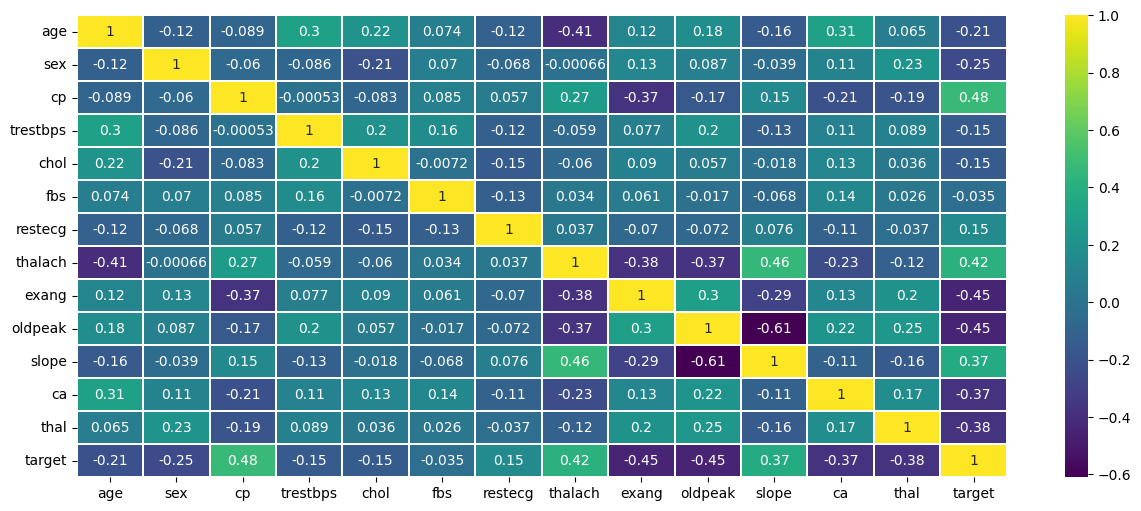

In [45]:
# Check correlation

plt.figure(figsize=(15,6))
corr = train.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,cmap="viridis",linecolor="w",linewidths=0.01,annot=True)

There are no extreme correlations

###  wrangle function

In [46]:
# Write a wrangle function to perform all the transformations in one go
def wrangle():
    df = pd.read_csv("dataset/archive/heart.csv")
    # Train test split
    df = df.drop_duplicates(keep='first')
    # split into train and test set
    train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['target'])
    
    # split into feature and label
    target_col = 'target'
    X_train  = train.drop(columns=['target'])
    y_train = train['target']
    X_test  = test.drop(columns=['target'])
    y_test = test['target']
    
    return X_train, y_train, X_test, y_test

In [47]:
# Test it out
X_train, y_train, X_test, y_test = wrangle()

In [48]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2


In [49]:
# Confirm
assert list(set(X_train.index)) == list(set(cat_df.index))